<a href="https://colab.research.google.com/github/lauben2001/Passive_Equity_TE/blob/main/Tracking_Error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Imports**

In [ ]:
!pip download yfinance > /dev/null
import yfinance

In [ ]:
!pip install fredapi > /dev/null
!pip install joypy > /dev/null
!pip install yahoo_fin > /dev/null
!pip install FPDF > /dev/null
!pip install yfinance > /dev/null
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [ ]:
from scipy.optimize import minimize, LinearConstraint
import joypy as joypy
import random
from dateutil.relativedelta import relativedelta
import datetime
from datetime import datetime
from numpy import random as np_random
from math import e
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from dateutil.relativedelta import relativedelta
import sys
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import randn
from scipy import array, newaxis
from fredapi import Fred
from yahoo_fin import options as op
from pandas_datareader.data import Options
from dateutil.parser import parse
from datetime import datetime
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm
from functools import partial
from scipy import optimize
from scipy.interpolate import griddata
import sys
from scipy.stats import norm
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from numpy.random import randn
from scipy import array, newaxis
from mpl_toolkits import mplot3d
import yahoo_fin.stock_info as si
import matplotlib.colors as mcolors
from pandas_datareader import data as pdr
from google.colab import drive

### **Functions**

In [ ]:
def yfin_query(start, list_name, dict_name):                                           #Only for Last Price
  all_results = []
  end= datetime.today().strftime("%Y-%m-%d")

  #Durch Liste loopen, alle Zeitreihen aus YFIN ziehen & in df temporär speichern
  for myid in list_name:
    results = pdr.get_data_yahoo(myid, start=start, end=end,progress=False)
    results[myid] = results["Adj Close"]
    results = results[myid]
    all_results.append(results)
  #Alle dataframes zusammenpacken und dann gemäß Dict umbennen
  df_yfin_results = pd.concat(all_results,axis =1)
  df_yfin_results.columns= [dict_name[c] for c in df_yfin_results.columns]

  return df_yfin_results

In [ ]:
def yfinance_query(list_name, dict_name):                                           #Only for Last Price
  all_results = []
  end= datetime.today().strftime("%Y-%m-%d")

  #Durch Liste loopen, alle Zeitreihen aus YFIN ziehen & in df temporär speichern
  for myid in list_name:
    results = yfinance.download(tickers = myid,period="5Y",interval="1m")
    results[myid] = results["Adj Close"]
    results = results[myid]
    all_results.append(results)
  #Alle dataframes zusammenpacken und dann gemäß Dict umbennen
  df_yfin_results = pd.concat(all_results,axis =1)
  df_yfin_results.columns= [dict_name[c] for c in df_yfin_results.columns]

  return df_yfin_results

In [ ]:
#Transform dataframe, so that we only get monthly data
def transform_df(df_input):




  return df_output

### **ID Collection**

In [ ]:
SP500_members_id = ['AAPL','MSFT','AMZN','NVDA','GOOGL','META','TSLA','GOOG','BRK-B','AVGO','UNH','JPM','LLY','V','XOM','JNJ','HD','MA','PG','COST','ABBV','MRK','ADBE','CVX','CRM','BAC','PEP','KO','AMD','WMT','ACN','MCD','NFLX','CSCO','TMO','LIN','INTC','ABT','WFC','CMCSA','DIS','INTU','ORCL','QCOM','VZ','TXN','BA','PFE','DHR','NKE','IBM','UNP','AMGN','PM','CAT','NOW','SPGI','COP','AMAT','HON','GE','LOW','UBER','NEE','GS','PLD','BKNG','T','UPS','MS','RTX','BLK','ISRG','SBUX','ELV','MDT','VRTX','SCHW','AXP','BMY','DE','TJX','LRCX','ADI','GILD','AMT','SYK','LMT','ADP','MDLZ','CVS','PANW','C','ETN','MMC','REGN','BX','ZTS','PGR','CB','MU','CI','SNPS','BSX','FI','KLAC','TMUS','SO','EQIX','SLB','DUK','CME','MO','CDNS','SHW','ITW','ICE','EOG','USB','BDX','CSX','PYPL','NOC','FDX','WM','TGT','ABNB','CL','CMG','AON','MCO','PNC','APD','NXPI','FCX','APH','ANET','MMM','MCK','PH','ROP','GD','PSX','HUM','LULU','MPC','ORLY','TT','EMR','MAR','TDG','HCA','PXD','NSC','ADSK','MSI','PCAR','WELL','MCHP','ECL','COF','GM','TFC','CCI','CTAS','CARR','AJG','DXCM','F','SRE','SPG','NEM','EW','AIG','AZO','PSA','ROST','HLT','DHI','IDXX','TEL','VLO','AEP','AFL','NUE','CPRT','WMB','MSCI','TRV','O','IQV','MET','MNST','D','PAYX','ADM','KMB','HES','A','DLR','BK','CNC','OKE','LHX','URI','OXY','AMP','CHTR','CTSH','CEG','DOW','STZ','GIS','PCG','PRU','AME','LEN','SYY','OTIS','ON','FTNT','FAST','GWW','ALL','KVUE','YUM','BIIB','CSGP','JCI','EXC','ODFL','FIS','ROK','PPG','IT','EA','VRSK','CMI','XEL','BKR','KMI','EL','COR','RSG','GPN','CTVA','EXR','VICI','HAL','KDP','DD','PWR','ED','PEG','MPWR','MLM','IR','EFX','CDW','VMC','GEHC','KHC','KR','RCL','DVN','MRNA','DG','KEYS','FICO','CBRE','ACGL','DLTR','FANG','DAL','HSY','WBD','SBAC','EIX','XYL','HPQ','AVB','DFS','WST','WEC','MTD','AWK','ANSS','FTV','TTWO','RMD','CAH','ZBH','APTV','WY','LYB','WTW','ULTA','HIG','STT','TROW','FITB','MTB','TSCO','GLW','BR','DTE','CHD','PHM','WAB','NVR','EBAY','HPE','ES','DOV','ETR','MOH','EQR','STE','HWM','RJF','IFF','PTC','ARE','ILMN','BLDR','FLT','TDY','IRM','PPL','INVH','VTR','DRI','BAX','EXPE','GPC','GRMN','TRGP','FE','CTRA','STLD','WAT','AEE','NTAP','HBAN','CCL','LH','CBOE','NDAQ','VRSN','BALL','RF','CNP','ALGN','AKAM','EXPD','WBA','FSLR','AXON','COO','SWKS','NTRS','LVS','CLX','PFG','HUBB','HOLX','FDS','TYL','VLTO','ALB','LUV','OMC','JBL','ATO','CMS','ENPH','EPAM','MKC','JBHT','BRO','TER','STX','CINF','WDC','J','IEX','AVY','CFG','EQT','ESS','TXT','MAA','SYF','EG','MAS','CE','BG','POOL','LW','DGX','SWK','SNA','BBY','TSN','PKG','LDOS','CF','PODD','UAL','MRO','WRB','K','CAG','DPZ','AMCR','KIM','ZBRA','NDSN','HST','KEY','LYV','SJM','GEN','AES','IP','LNT','TRMB','IPG','RVTY','L','LKQ','VTRS','MOS','EVRG','JKHY','TFX','TECH','CRL','KMX','ROL','PNR','MGM','INCY','TAP','UDR','NRG','REG','QRVO','NI','APA','WRK','EMN','PEAK','MKTX','CDAY','GL','CPT','FFIV','BF-B','ALLE','BXP','CZR','HII','AOS','PAYC','CHRW','HSIC','ETSY','AAL','RHI','JNPR','BBWI','MTCH','UHS','NWSA','HRL','CPB','NCLH','WYNN','AIZ','TPR','BEN','PNW','BWA','GNRC','IVZ','PARA','FRT','FOXA','FMC','CTLT','CMA','XRAY','HAS','VFC','WHR','ZION','BIO','DVA','RL','MHK','FOX','NWS']
SP500_members_dict = {'AAPL':'AAPL','MSFT':'MSFT','AMZN':'AMZN','NVDA':'NVDA','GOOGL':'GOOGL','META':'META','TSLA':'TSLA','GOOG':'GOOG','BRK-B':'BRK-B','AVGO':'AVGO','UNH':'UNH','JPM':'JPM','LLY':'LLY','V':'V','XOM':'XOM','JNJ':'JNJ','HD':'HD','MA':'MA','PG':'PG','COST':'COST','ABBV':'ABBV','MRK':'MRK','ADBE':'ADBE','CVX':'CVX','CRM':'CRM','BAC':'BAC','PEP':'PEP','KO':'KO','AMD':'AMD','WMT':'WMT','ACN':'ACN','MCD':'MCD','NFLX':'NFLX','CSCO':'CSCO','TMO':'TMO','LIN':'LIN','INTC':'INTC','ABT':'ABT','WFC':'WFC','CMCSA':'CMCSA','DIS':'DIS','INTU':'INTU','ORCL':'ORCL','QCOM':'QCOM','VZ':'VZ','TXN':'TXN','BA':'BA','PFE':'PFE','DHR':'DHR','NKE':'NKE','IBM':'IBM','UNP':'UNP','AMGN':'AMGN','PM':'PM','CAT':'CAT','NOW':'NOW','SPGI':'SPGI','COP':'COP','AMAT':'AMAT','HON':'HON','GE':'GE','LOW':'LOW','UBER':'UBER','NEE':'NEE','GS':'GS','PLD':'PLD','BKNG':'BKNG','T':'T','UPS':'UPS','MS':'MS','RTX':'RTX','BLK':'BLK','ISRG':'ISRG','SBUX':'SBUX','ELV':'ELV','MDT':'MDT','VRTX':'VRTX','SCHW':'SCHW','AXP':'AXP','BMY':'BMY','DE':'DE','TJX':'TJX','LRCX':'LRCX','ADI':'ADI','GILD':'GILD','AMT':'AMT','SYK':'SYK','LMT':'LMT','ADP':'ADP','MDLZ':'MDLZ','CVS':'CVS','PANW':'PANW','C':'C','ETN':'ETN','MMC':'MMC','REGN':'REGN','BX':'BX','ZTS':'ZTS','PGR':'PGR','CB':'CB','MU':'MU','CI':'CI','SNPS':'SNPS','BSX':'BSX','FI':'FI','KLAC':'KLAC','TMUS':'TMUS','SO':'SO','EQIX':'EQIX','SLB':'SLB','DUK':'DUK','CME':'CME','MO':'MO','CDNS':'CDNS','SHW':'SHW','ITW':'ITW','ICE':'ICE','EOG':'EOG','USB':'USB','BDX':'BDX','CSX':'CSX','PYPL':'PYPL','NOC':'NOC','FDX':'FDX','WM':'WM','TGT':'TGT','ABNB':'ABNB','CL':'CL','CMG':'CMG','AON':'AON','MCO':'MCO','PNC':'PNC','APD':'APD','NXPI':'NXPI','FCX':'FCX','APH':'APH','ANET':'ANET','MMM':'MMM','MCK':'MCK','PH':'PH','ROP':'ROP','GD':'GD','PSX':'PSX','HUM':'HUM','LULU':'LULU','MPC':'MPC','ORLY':'ORLY','TT':'TT','EMR':'EMR','MAR':'MAR','TDG':'TDG','HCA':'HCA','PXD':'PXD','NSC':'NSC','ADSK':'ADSK','MSI':'MSI','PCAR':'PCAR','WELL':'WELL','MCHP':'MCHP','ECL':'ECL','COF':'COF','GM':'GM','TFC':'TFC','CCI':'CCI','CTAS':'CTAS','CARR':'CARR','AJG':'AJG','DXCM':'DXCM','F':'F','SRE':'SRE','SPG':'SPG','NEM':'NEM','EW':'EW','AIG':'AIG','AZO':'AZO','PSA':'PSA','ROST':'ROST','HLT':'HLT','DHI':'DHI','IDXX':'IDXX','TEL':'TEL','VLO':'VLO','AEP':'AEP','AFL':'AFL','NUE':'NUE','CPRT':'CPRT','WMB':'WMB','MSCI':'MSCI','TRV':'TRV','O':'O','IQV':'IQV','MET':'MET','MNST':'MNST','D':'D','PAYX':'PAYX','ADM':'ADM','KMB':'KMB','HES':'HES','A':'A','DLR':'DLR','BK':'BK','CNC':'CNC','OKE':'OKE','LHX':'LHX','URI':'URI','OXY':'OXY','AMP':'AMP','CHTR':'CHTR','CTSH':'CTSH','CEG':'CEG','DOW':'DOW','STZ':'STZ','GIS':'GIS','PCG':'PCG','PRU':'PRU','AME':'AME','LEN':'LEN','SYY':'SYY','OTIS':'OTIS','ON':'ON','FTNT':'FTNT','FAST':'FAST','GWW':'GWW','ALL':'ALL','KVUE':'KVUE','YUM':'YUM','BIIB':'BIIB','CSGP':'CSGP','JCI':'JCI','EXC':'EXC','ODFL':'ODFL','FIS':'FIS','ROK':'ROK','PPG':'PPG','IT':'IT','EA':'EA','VRSK':'VRSK','CMI':'CMI','XEL':'XEL','BKR':'BKR','KMI':'KMI','EL':'EL','COR':'COR','RSG':'RSG','GPN':'GPN','CTVA':'CTVA','EXR':'EXR','VICI':'VICI','HAL':'HAL','KDP':'KDP','DD':'DD','PWR':'PWR','ED':'ED','PEG':'PEG','MPWR':'MPWR','MLM':'MLM','IR':'IR','EFX':'EFX','CDW':'CDW','VMC':'VMC','GEHC':'GEHC','KHC':'KHC','KR':'KR','RCL':'RCL','DVN':'DVN','MRNA':'MRNA','DG':'DG','KEYS':'KEYS','FICO':'FICO','CBRE':'CBRE','ACGL':'ACGL','DLTR':'DLTR','FANG':'FANG','DAL':'DAL','HSY':'HSY','WBD':'WBD','SBAC':'SBAC','EIX':'EIX','XYL':'XYL','HPQ':'HPQ','AVB':'AVB','DFS':'DFS','WST':'WST','WEC':'WEC','MTD':'MTD','AWK':'AWK','ANSS':'ANSS','FTV':'FTV','TTWO':'TTWO','RMD':'RMD','CAH':'CAH','ZBH':'ZBH','APTV':'APTV','WY':'WY','LYB':'LYB','WTW':'WTW','ULTA':'ULTA','HIG':'HIG','STT':'STT','TROW':'TROW','FITB':'FITB','MTB':'MTB','TSCO':'TSCO','GLW':'GLW','BR':'BR','DTE':'DTE','CHD':'CHD','PHM':'PHM','WAB':'WAB','NVR':'NVR','EBAY':'EBAY','HPE':'HPE','ES':'ES','DOV':'DOV','ETR':'ETR','MOH':'MOH','EQR':'EQR','STE':'STE','HWM':'HWM','RJF':'RJF','IFF':'IFF','PTC':'PTC','ARE':'ARE','ILMN':'ILMN','BLDR':'BLDR','FLT':'FLT','TDY':'TDY','IRM':'IRM','PPL':'PPL','INVH':'INVH','VTR':'VTR','DRI':'DRI','BAX':'BAX','EXPE':'EXPE','GPC':'GPC','GRMN':'GRMN','TRGP':'TRGP','FE':'FE','CTRA':'CTRA','STLD':'STLD','WAT':'WAT','AEE':'AEE','NTAP':'NTAP','HBAN':'HBAN','CCL':'CCL','LH':'LH','CBOE':'CBOE','NDAQ':'NDAQ','VRSN':'VRSN','BALL':'BALL','RF':'RF','CNP':'CNP','ALGN':'ALGN','AKAM':'AKAM','EXPD':'EXPD','WBA':'WBA','FSLR':'FSLR','AXON':'AXON','COO':'COO','SWKS':'SWKS','NTRS':'NTRS','LVS':'LVS','CLX':'CLX','PFG':'PFG','HUBB':'HUBB','HOLX':'HOLX','FDS':'FDS','TYL':'TYL','VLTO':'VLTO','ALB':'ALB','LUV':'LUV','OMC':'OMC','JBL':'JBL','ATO':'ATO','CMS':'CMS','ENPH':'ENPH','EPAM':'EPAM','MKC':'MKC','JBHT':'JBHT','BRO':'BRO','TER':'TER','STX':'STX','CINF':'CINF','WDC':'WDC','J':'J','IEX':'IEX','AVY':'AVY','CFG':'CFG','EQT':'EQT','ESS':'ESS','TXT':'TXT','MAA':'MAA','SYF':'SYF','EG':'EG','MAS':'MAS','CE':'CE','BG':'BG','POOL':'POOL','LW':'LW','DGX':'DGX','SWK':'SWK','SNA':'SNA','BBY':'BBY','TSN':'TSN','PKG':'PKG','LDOS':'LDOS','CF':'CF','PODD':'PODD','UAL':'UAL','MRO':'MRO','WRB':'WRB','K':'K','CAG':'CAG','DPZ':'DPZ','AMCR':'AMCR','KIM':'KIM','ZBRA':'ZBRA','NDSN':'NDSN','HST':'HST','KEY':'KEY','LYV':'LYV','SJM':'SJM','GEN':'GEN','AES':'AES','IP':'IP','LNT':'LNT','TRMB':'TRMB','IPG':'IPG','RVTY':'RVTY','L':'L','LKQ':'LKQ','VTRS':'VTRS','MOS':'MOS','EVRG':'EVRG','JKHY':'JKHY','TFX':'TFX','TECH':'TECH','CRL':'CRL','KMX':'KMX','ROL':'ROL','PNR':'PNR','MGM':'MGM','INCY':'INCY','TAP':'TAP','UDR':'UDR','NRG':'NRG','REG':'REG','QRVO':'QRVO','NI':'NI','APA':'APA','WRK':'WRK','EMN':'EMN','PEAK':'PEAK','MKTX':'MKTX','CDAY':'CDAY','GL':'GL','CPT':'CPT','FFIV':'FFIV','BF-B':'BF-B','ALLE':'ALLE','BXP':'BXP','CZR':'CZR','HII':'HII','AOS':'AOS','PAYC':'PAYC','CHRW':'CHRW','HSIC':'HSIC','ETSY':'ETSY','AAL':'AAL','RHI':'RHI','JNPR':'JNPR','BBWI':'BBWI','MTCH':'MTCH','UHS':'UHS','NWSA':'NWSA','HRL':'HRL','CPB':'CPB','NCLH':'NCLH','WYNN':'WYNN','AIZ':'AIZ','TPR':'TPR','BEN':'BEN','PNW':'PNW','BWA':'BWA','GNRC':'GNRC','IVZ':'IVZ','PARA':'PARA','FRT':'FRT','FOXA':'FOXA','FMC':'FMC','CTLT':'CTLT','CMA':'CMA','XRAY':'XRAY','HAS':'HAS','VFC':'VFC','WHR':'WHR','ZION':'ZION','BIO':'BIO','DVA':'DVA','RL':'RL','MHK':'MHK','FOX':'FOX','NWS':'NWS'}

## **Tracking Error**

###**Preperations & Estimations**

Estimate variance-covariance matrix

In [ ]:
df_SP500 = yfin_query(start="2015-01-01", list_name = SP500_members_id, dict_name = SP500_members_dict)

In [ ]:
#Estimation of the covariance matrix based on daily returns
df_SP500_daily_returns = df_SP500.pct_change()
df_SP500_daily_returns = df_SP500_daily_returns.iloc[1:]
df_SP500_cov_matrix_d = df_SP500_daily_returns.cov() * 252

#Estimation of the covariance matrix based on monthly returns
df_SP500_monthly = df_SP500.resample('MS').first()
df_SP500_monthly_returns = df_SP500_monthly.pct_change()
df_SP500_monthly_returns = df_SP500_monthly_returns.iloc[1:]
df_SP500_cov_matrix_m = df_SP500_monthly_returns.cov() * 12

#PLotting of the correlation matrix
Corr_diff = df_SP500_monthly_returns.corr() - df_SP500_daily_returns.corr()

#Decide for one final matrix
df_SP500_cov_matrix = df_SP500_cov_matrix_m.copy()

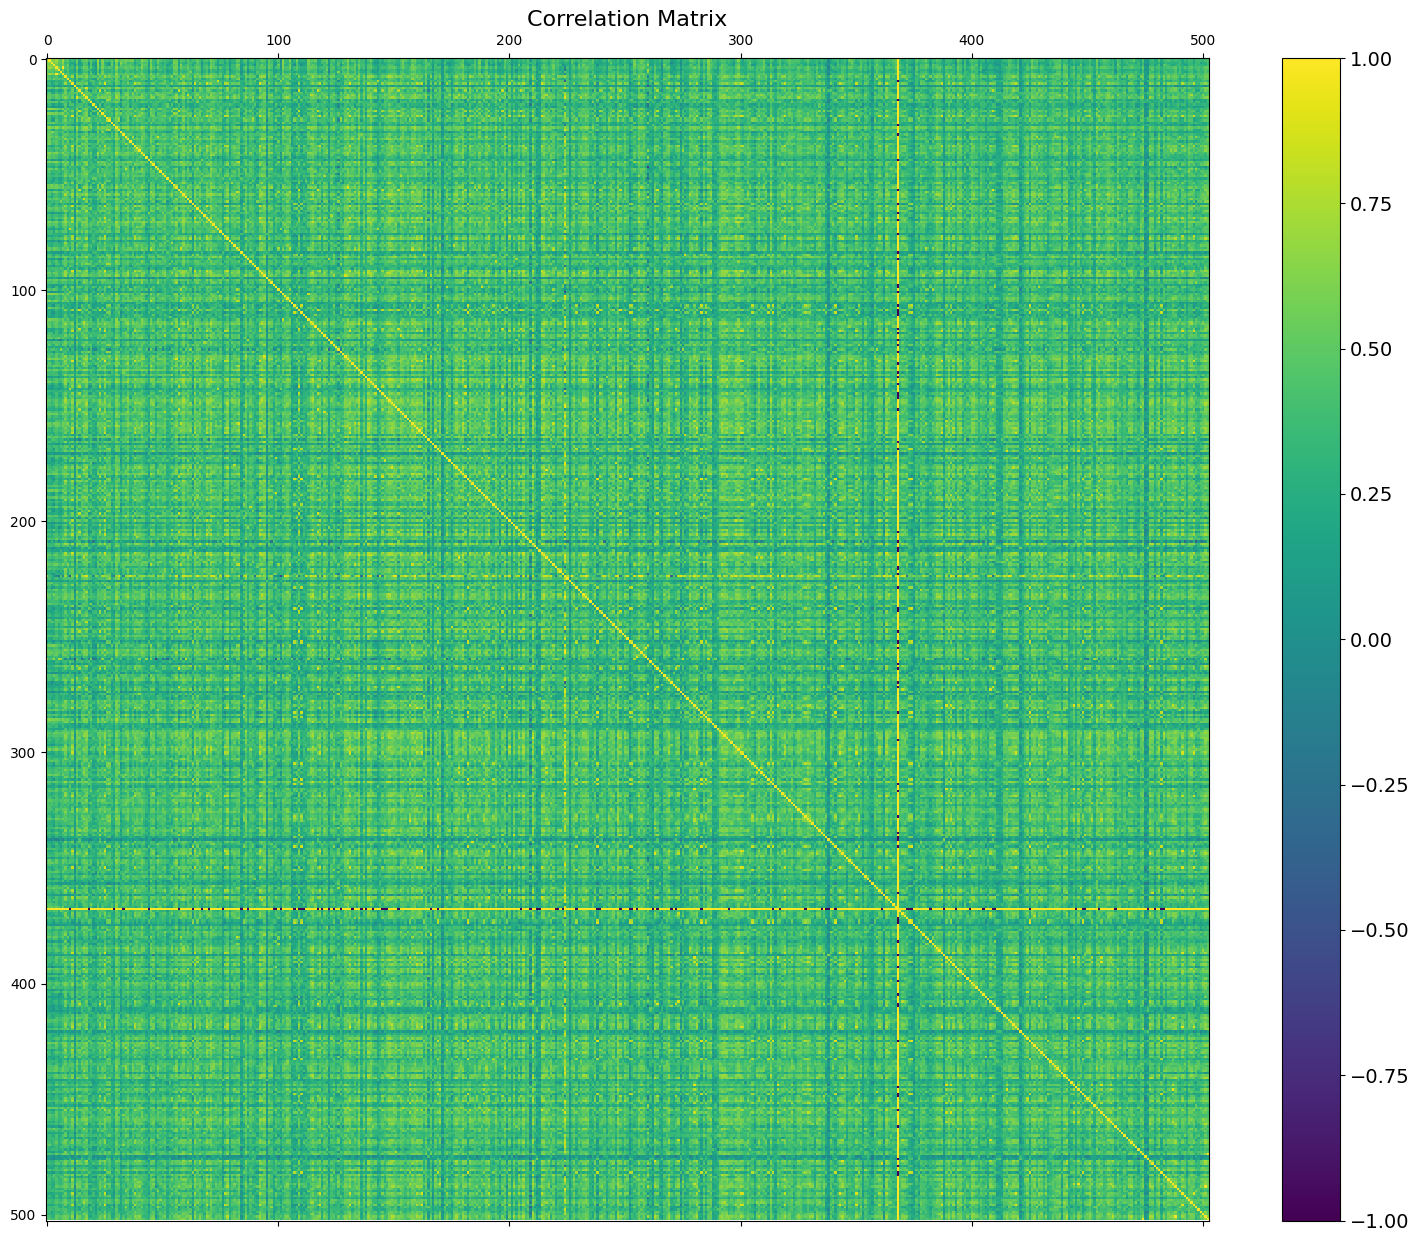

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_SP500_monthly_returns.corr(), fignum=f.number)
#plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
#plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

Load in Weight Vector

In [ ]:
drive.mount("/content/drive")

In [ ]:
#Importieren der Daten & Cleanen
path="/content/drive/MyDrive/Daten - Phyton /SP500_Holdings.xlsm"
sheet_name= "Vector"
df_SP500_weights =pd.read_excel(path,sheet_name)
df_SP500_weights = df_SP500_weights = df_SP500_weights.set_index('Stock')
df_SP500_weights["number"] = range(1, (len(df_SP500_weights.index)) + 1)
df_SP500_weights['Industry'] = df_SP500_weights['Industry'].apply(lambda x: x.strip())
df_SP500_weights

In [ ]:
#Function to apply to dataframe to receive new weights
def weight_allocation(row):
    if row['Size'] <= row['mcap_cutoff']:
        val = 0
    else:
        val = row['Weight'] + row["weight_excess"]
    return val

###**Systematic Sampling**

In [ ]:
number_stocks = len(df_SP500_weights.index)
remaining_stocks = 250
cutoff_weights = df_SP500_weights["Weight"].tail(number_stocks - remaining_stocks).sum()
cutoff_fraction = (number_stocks - remaining_stocks) / number_stocks

In [ ]:
df_syst_weights = df_SP500_weights.copy()
#Set everything below threshold to 0 and add evently "excess" weights to stocks above
cutoff_mcap = df_syst_weights["Size"].iloc[remaining_stocks]
df_syst_weights["mcap_cutoff"] = cutoff_mcap
df_syst_weights["weight_excess"] = cutoff_weights / remaining_stocks
df_syst_weights["new_weight"]= df_syst_weights.apply(weight_allocation, axis=1)

df_syst_difference_weights = df_SP500_weights.copy()
df_syst_difference_weights["Weight"] = df_syst_weights["new_weight"] - df_SP500_weights["Weight"]

Plot the differences

<function matplotlib.pyplot.show(close=None, block=None)>

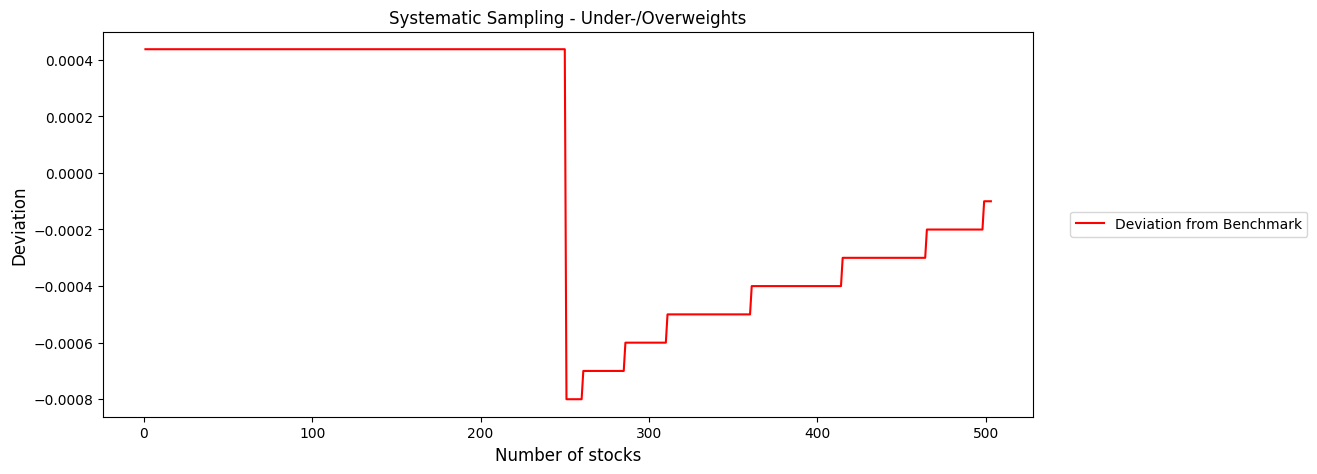

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel('Number of stocks', size = 12)
plt.ylabel('Deviation', size = 12)
plt.plot(df_syst_difference_weights["number"],df_syst_difference_weights["Weight"], label="Deviation from Benchmark" , color="red" ,linewidth=1.5)
plt.title("Systematic Sampling - Under-/Overweights")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show

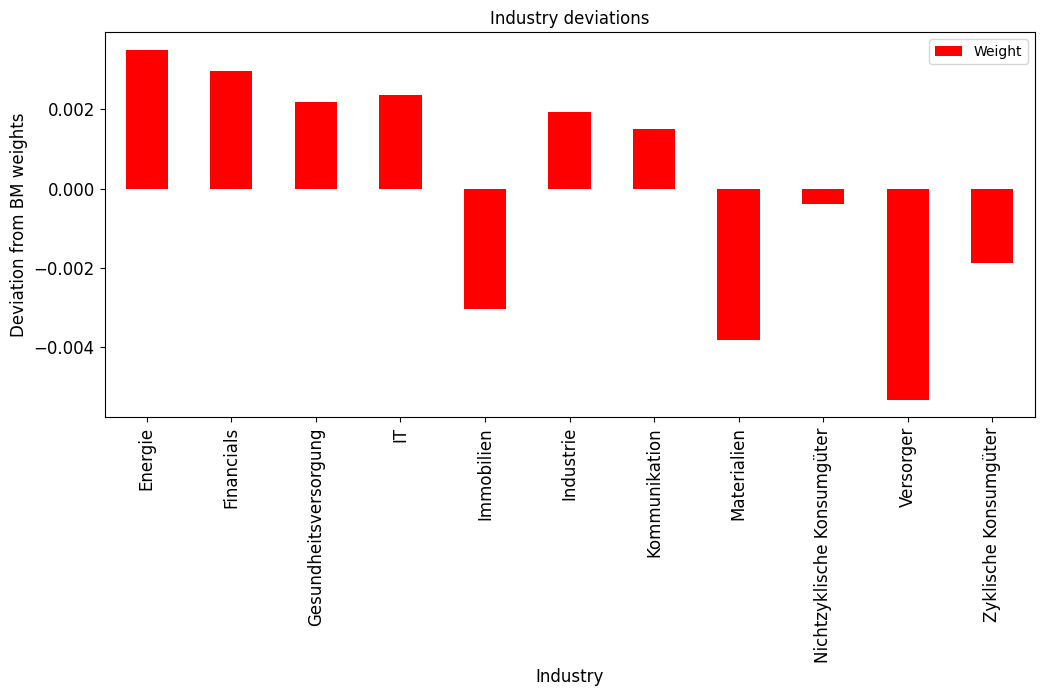

In [ ]:
industry_diff = df_syst_difference_weights[["Weight","Industry"]].groupby(['Industry']).sum()
ax = industry_diff["Weight"].plot(kind='bar', title ="Industry deviations", figsize=(12, 5), color = "red", legend=True, fontsize=12)
ax.set_xlabel("Industry", fontsize=12)
ax.set_ylabel("Deviation from BM weights", fontsize=12)
plt.show()

Estimate tracking error

In [ ]:
TE = (df_syst_difference_weights["Weight"].T @ df_SP500_cov_matrix @ df_syst_difference_weights["Weight"])**0.5

Marginal contribution to TE

In [ ]:
MCTE = (1/TE) * (df_SP500_cov_matrix @ df_syst_difference_weights["Weight"])

###**Stratified Sampling**

In [ ]:
#Function to apply to dataframe to receive new weights
def group_allocation_size(row):
    if row['Size'] <= row['mcap_cutoff']:
        val = "Small"
    else:
        val = "Big"
    return val

In [ ]:
df_strat_weights = df_SP500_weights.copy()
df_strat_weights["size_ind"] = df_strat_weights["Size"]
size_threshold = df_strat_weights["size_ind"].iloc[remaining_stocks]
df_strat_weights["mcap_cutoff"] = size_threshold
df_strat_weights["size_ind"] = df_strat_weights.apply(group_allocation_size, axis=1)
df_strat_weights["strata"] = df_strat_weights["Industry"] + "_" + df_strat_weights["size_ind"]

#Preperation: I) List for loop     II)Dics for Transformation
size_list = df_strat_weights["size_ind"].unique().tolist()
industry_list = df_strat_weights["Industry"].unique().tolist()
mcap_cutoff_starta = {}
weight_excess_starta = {}

#Loop to fill Dicts in order to apply function in next step
for size in size_list:
  for industry in industry_list:
    weight_sum = df_strat_weights["Weight"].loc[(df_strat_weights["size_ind"] == size) & (df_strat_weights["Industry"] == industry)].sum()
    number_stocks_strat= len(df_strat_weights["Weight"].loc[(df_strat_weights["size_ind"] == size) & (df_strat_weights["Industry"] == industry)].index)
    number_discard_stocks = round(number_stocks_strat * cutoff_fraction)
    number_remaining_stocks = number_stocks_strat - number_discard_stocks
    excess_weight = df_strat_weights["Weight"].loc[(df_strat_weights["size_ind"] == size) & (df_strat_weights["Industry"] == industry)].iloc[number_remaining_stocks:number_stocks_strat].sum()
    mcap_cutoff = df_strat_weights["Size"].loc[(df_strat_weights["size_ind"] == size) & (df_strat_weights["Industry"] == industry)].iloc[number_remaining_stocks]
    added_weight_per_stock = excess_weight / number_remaining_stocks
    #Fill up the Dicts
    starta = industry + "_" + size
    mcap_cutoff_starta[starta] = mcap_cutoff
    weight_excess_starta[starta] = added_weight_per_stock

#Map the dicts to the columns with .map
df_strat_weights["mcap_cutoff"] = df_strat_weights["strata"].map(mcap_cutoff_starta)
df_strat_weights["weight_excess"] = df_strat_weights["strata"].map(weight_excess_starta)
#Apply function
df_strat_weights["new_weights"] = df_strat_weights.apply(weight_allocation, axis=1)

df_strat_weights

,Weight,Industry,Size,number,size_ind,mcap_cutoff,strata,weight_excess,new_weights
Stock,,,,,,,,,
AAPL,0.072858,IT,5.163715e+09,1,Big,1.789560e+08,IT_Big,0.001546,0.074404
MSFT,0.069456,IT,4.925890e+09,2,Big,1.789560e+08,IT_Big,0.001546,0.071001
AMZN,0.034428,Zyklische Konsumgüter,2.438163e+09,3,Big,1.015381e+08,Zyklische Konsumgüter_Big,0.001174,0.035601
NVDA,0.030424,IT,2.158853e+09,4,Big,1.789560e+08,IT_Big,0.001546,0.031970
GOOGL,0.019816,Kommunikation,1.402893e+09,5,Big,3.056217e+08,Kommunikation_Big,0.003042,0.022858
...,...,...,...,...,...,...,...,...,...
DVA,0.000100,Gesundheitsversorgung,1.026641e+07,499,Small,3.103331e+07,Gesundheitsversorgung_Small,0.000274,0.000000
RL,0.000100,Zyklische Konsumgüter,1.019777e+07,500,Small,2.494632e+07,Zyklische Konsumgüter_Small,0.000240,0.000000
MHK,0.000100,Zyklische Konsumgüter,1.015554e+07,501,Small,2.494632e+07,Zyklische Konsumgüter_Small,0.000240,0.000000


In [ ]:
df_strat_difference_weights = df_SP500_weights.copy()
df_strat_difference_weights["Weight"] = df_strat_weights["new_weights"] - df_SP500_weights["Weight"]
df_strat_difference_weights

,Weight,Industry,Size,number
Stock,,,,
AAPL,0.001546,IT,5.163715e+09,1
MSFT,0.001546,IT,4.925890e+09,2
AMZN,0.001174,Zyklische Konsumgüter,2.438163e+09,3
NVDA,0.001546,IT,2.158853e+09,4
GOOGL,0.003042,Kommunikation,1.402893e+09,5
...,...,...,...,...
DVA,-0.000100,Gesundheitsversorgung,1.026641e+07,499
RL,-0.000100,Zyklische Konsumgüter,1.019777e+07,500
MHK,-0.000100,Zyklische Konsumgüter,1.015554e+07,501


Plot the differences

<function matplotlib.pyplot.show(close=None, block=None)>

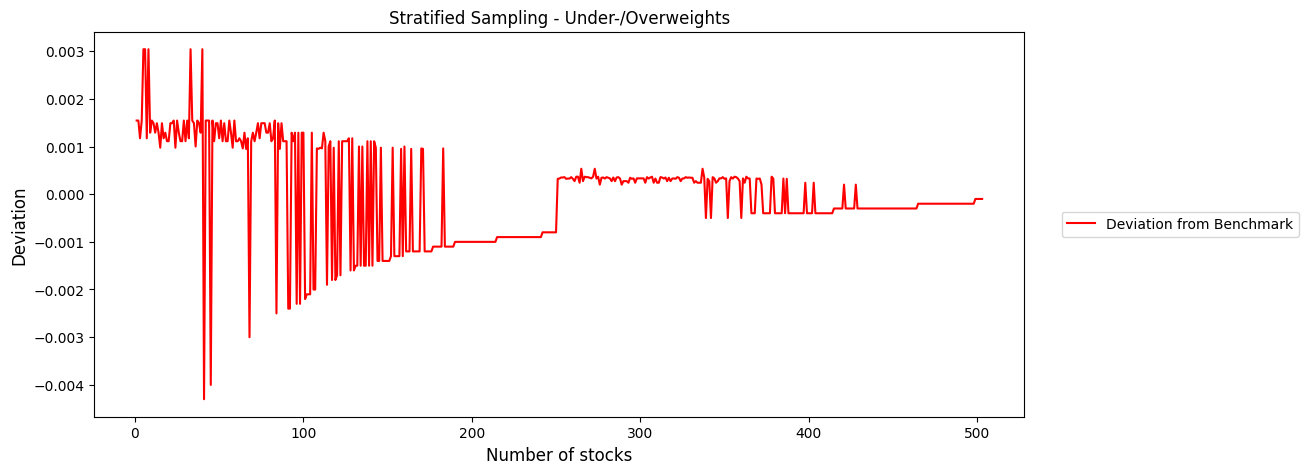

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel('Number of stocks', size = 12)
plt.ylabel('Deviation', size = 12)
plt.plot(df_strat_difference_weights["number"],df_strat_difference_weights["Weight"], label="Deviation from Benchmark" , color="red" ,linewidth=1.5)
plt.title("Stratified Sampling - Under-/Overweights")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show

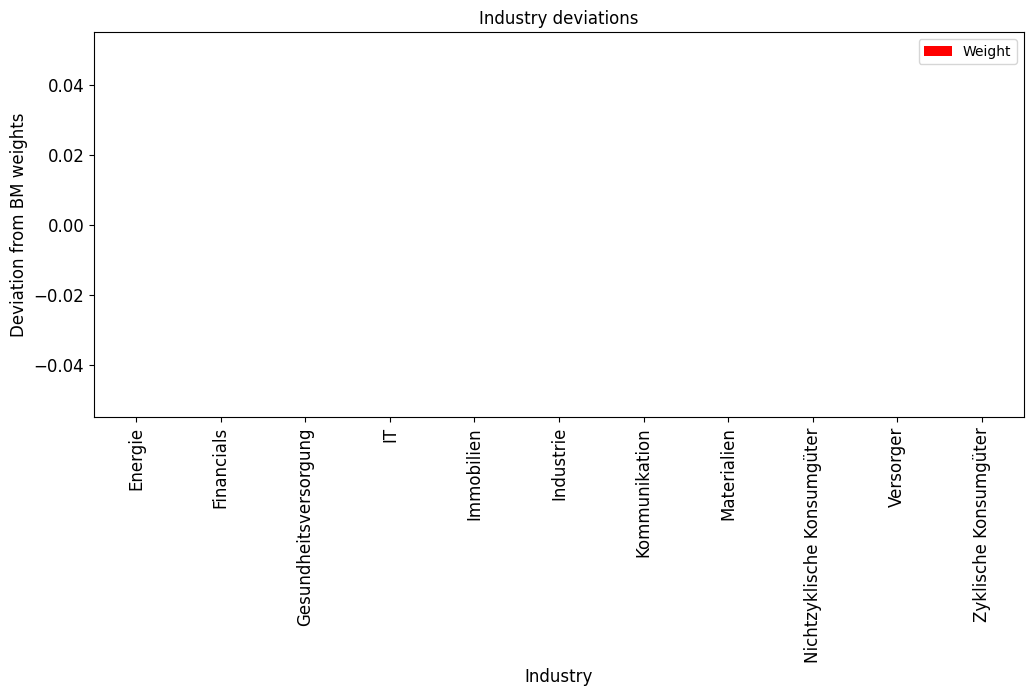

In [ ]:
industry_diff = round(df_strat_difference_weights[["Weight","Industry"]].groupby(['Industry']).sum(),4)
ax = industry_diff["Weight"].plot(kind='bar', title ="Industry deviations", figsize=(12, 5), color = "red", legend=True, fontsize=12)
ax.set_xlabel("Industry", fontsize=12)
ax.set_ylabel("Deviation from BM weights", fontsize=12)
plt.show()

Tracking Error

In [ ]:
TE = (df_strat_difference_weights["Weight"].T @ df_SP500_cov_matrix @ df_strat_difference_weights["Weight"])**0.5
TE

0.007242119094396013

Marginal Contribution to TE

In [ ]:
MCTE = (1/TE) * (df_SP500_cov_matrix @ df_strat_difference_weights["Weight"])
MCTE

AAPL     0.047098
MSFT     0.096417
AMZN     0.106183
NVDA     0.156579
GOOGL    0.086612
           ...   
DVA      0.030745
RL      -0.023770
MHK     -0.052183
FOX     -0.092713
NWS     -0.010874
Length: 503, dtype: float64

###**Optimization**

In [ ]:
var_cov_matrix = df_SP500_cov_matrix.to_numpy()
benchmark_weights_vector = df_SP500_weights["Weight"].to_numpy()
initial_guess = df_syst_weights["new_weight"].to_numpy()
number_stocks = int(benchmark_weights_vector.shape[0])
remaining_stocks = 250

In [ ]:
# Define your objective function (replace this with your actual objective function)
def objective_function(x):
  diff_weights = x - benchmark_weights_vector
  tracking_error_variance = (diff_weights.T @ var_cov_matrix @ diff_weights)
  return tracking_error_variance

def constraint_function_zero_count(x):
    return 250 - np.sum(x == 0)

def constraint_function_sum_one(x):
    return np.sum(x) - 1

# Define the nonlinear constraints
TE_const_1 = {'type':'eq' ,'fun':constraint_function_zero_count}
TE_const_2 = {'type':'eq' ,'fun':constraint_function_sum_one}

# Define the bounds for each element (between 0 and 1)
rough_weight_bound = (0.0, 1.0)
rough_weight_bounds = (rough_weight_bound,) * 503

#Define narrow ranges for each weight
narrow_weight_bounds = ()
for i in benchmark_weights_vector:
  narrow_weight_bound = (0.0, i +0.1)
  narrow_weight_bounds += (narrow_weight_bound,)

# Perform the optimization
TE_solution = minimize(objective_function, initial_guess, constraints=[TE_const_1, TE_const_2], bounds=narrow_weight_bounds, method='SLSQP',tol=1e-3)
opt_vector = TE_solution.x

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


In [ ]:
TE_solution

 message: Positive directional derivative for linesearch
 success: False
  status: 8
     fun: 25.41306462449749
       x: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
     nit: 10
     jac: [ 1.779e+00  1.758e+00 ...  2.522e+00  2.049e+00]
    nfev: 3035
    njev: 6

In [ ]:
TE_solution.fun**0.5

<function matplotlib.pyplot.show(close=None, block=None)>

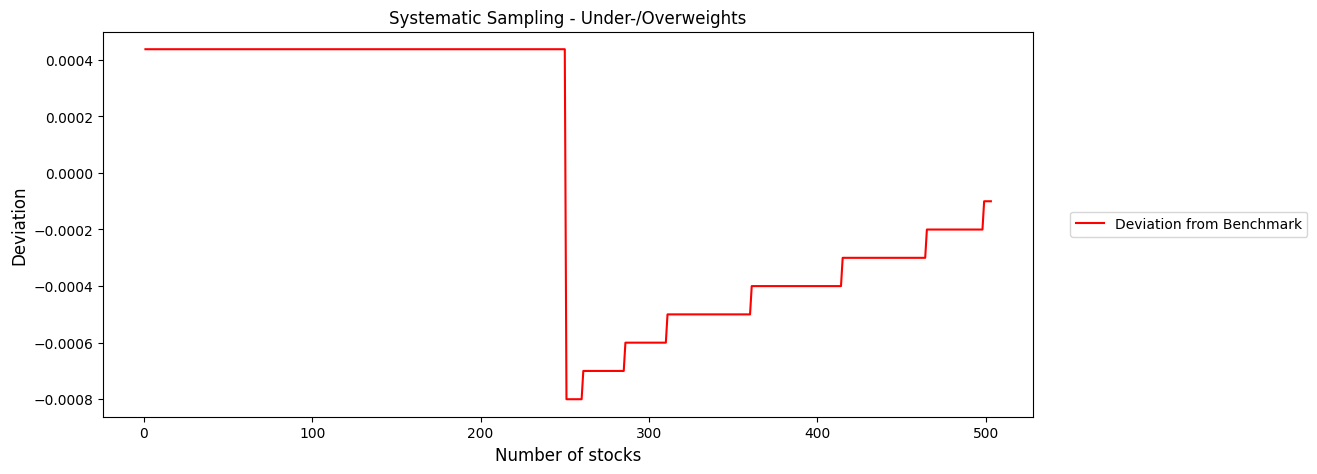

In [ ]:
df_opt_difference_weights = df_SP500_weights.copy()
df_opt_difference_weights["Weight"] = opt_vector - df_SP500_weights["Weight"]

plt.figure(figsize=(12,5))
plt.xlabel('Number of stocks', size = 12)
plt.ylabel('Deviation', size = 12)
plt.plot(df_opt_difference_weights["number"],df_opt_difference_weights["Weight"], label="Deviation from Benchmark" , color="red" ,linewidth=1.5)
plt.title("Systematic Sampling - Under-/Overweights")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show

## **Simulation**

In [ ]:
return_vector = df_SP500_daily_returns.to_numpy()
return_vector.shape
return_array = return_vector[2251, :]
return_array

In [ ]:
benchmark_weights_vector = df_SP500_weights["Weight"].to_numpy()
benchmark_weights_vector.shape

In [ ]:
p_return = benchmark_weights_vector.T @ return_array
new_weights = (benchmark_weights_vector.T * (1+return_array)) * (1/(1+p_return))
new_weights